# 1 - Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


# 2 - Exploratory Data Analysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276847,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0


In [26]:
len(df[df.duplicated()])

0

In [3]:
df.drop(['case_id', 'patientid'], axis=1, inplace=True)

#### A quick note about dropping the case id and patient id:
Without dropping the ids there are no duplicated values in the datasets, but dropping them introduces duplicates, indicating that some cases had exactly the same information but with the different IDs they really are different not duplicates.

In [6]:
df.groupby('Stay').count()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
Stay,,,,,,,,,,,,,,,,,
0-10,23604,23604,23604,23604,23604,23604,23604,23604,23604,23602,23604,23252,23604,23604,23604,23604,23604
11-20,78139,78139,78139,78139,78139,78139,78139,78139,78139,78120,78139,77114,78139,78139,78139,78139,78139
21-30,87491,87491,87491,87491,87491,87491,87491,87491,87491,87454,87491,86353,87491,87491,87491,87491,87491
31-40,55159,55159,55159,55159,55159,55159,55159,55159,55159,55137,55159,54334,55159,55159,55159,55159,55159
41-50,11743,11743,11743,11743,11743,11743,11743,11743,11743,11735,11743,11549,11743,11743,11743,11743,11743
51-60,35018,35018,35018,35018,35018,35018,35018,35018,35018,35005,35018,34476,35018,35018,35018,35018,35018
61-70,2744,2744,2744,2744,2744,2744,2744,2744,2744,2740,2744,2702,2744,2744,2744,2744,2744
71-80,10254,10254,10254,10254,10254,10254,10254,10254,10254,10250,10254,10100,10254,10254,10254,10254,10254
81-90,4838,4838,4838,4838,4838,4838,4838,4838,4838,4837,4838,4762,4838,4838,4838,4838,4838


In [7]:
stays = []
for i in range(len(df.Stay.unique())):
    stays.append(df.Stay.value_counts()[i])

Stays = pd.DataFrame((df.Stay.unique(), stays), index=['Days', 'Counts']).transpose()
Stays

,Days,Counts
0,0-10,87491
1,41-50,78139
2,31-40,55159
3,11-20,35018
4,51-60,23604
5,21-30,11743
6,71-80,10254
7,More than 100 Days,6683
8,81-90,4838
9,61-70,2765


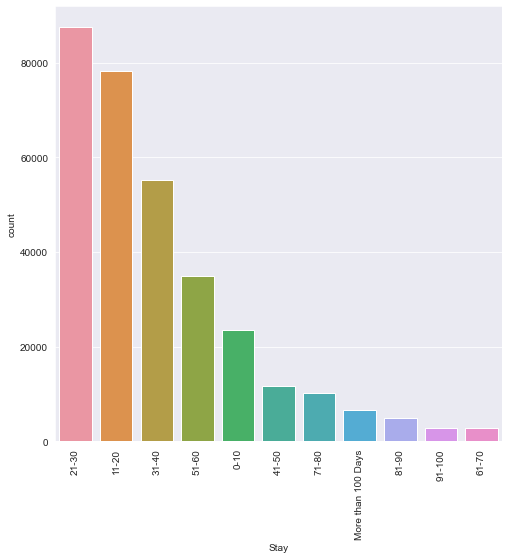

In [8]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='Stay', order=df['Stay'].value_counts().index)
plt.xticks(rotation=90);

highly skewed, imbalanced

In [20]:
def plot_box(data, label):
    plt.figure(figsize=(5, 5), dpi=100)
    sns.boxplot(x=label, data=data)
    plt.title(f'{label}')
    if len(data[label]) > 5:
        plt.xticks(rotation=90)


In [21]:
def plot_count(data, label, rotate=False, hue_flag=False):
    plt.figure(figsize=(6, 6), dpi=100)
    hue = None
    if hue_flag:
        hue = 'Stay'
    sns.countplot(x=label, data=data, order=data[label].value_counts().index, hue=hue)
    plt.title(f'{label}')
    if rotate:
        plt.xticks(rotation=90)

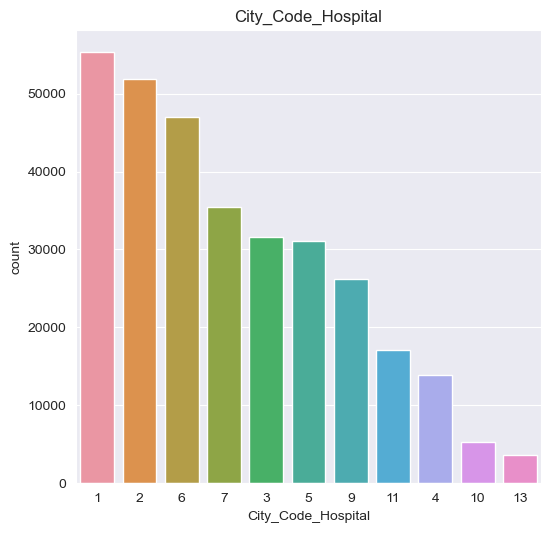

In [11]:
plot_count(df, 'City_Code_Hospital')

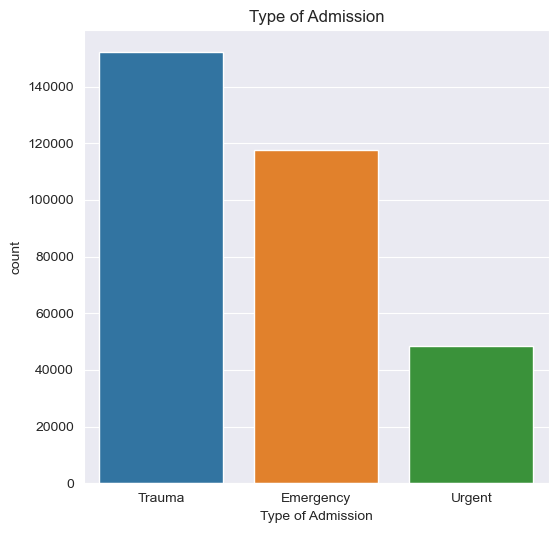

In [12]:
plot_count(df, 'Type of Admission')

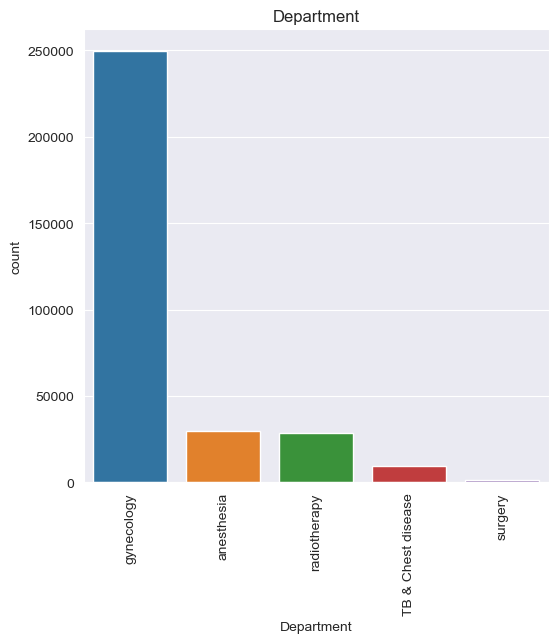

In [13]:
plot_count(df, 'Department', rotate=True)

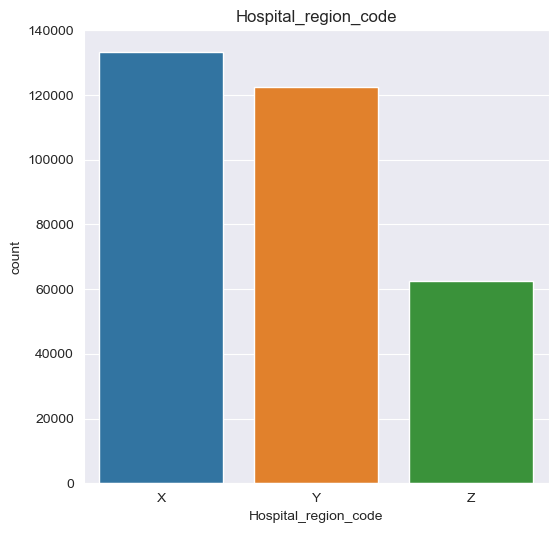

In [14]:
plot_count(df, 'Hospital_region_code')

<AxesSubplot:xlabel='City_Code_Patient', ylabel='Density'>

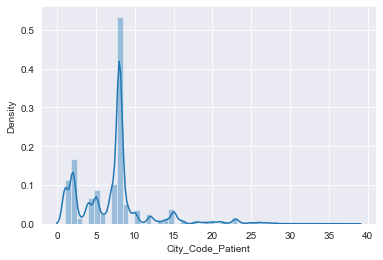

In [15]:
sns.distplot(df['City_Code_Patient'])

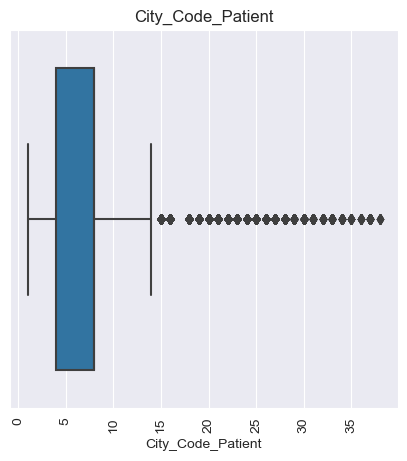

In [18]:
plot_box(df, 'City_Code_Patient')

Outliers

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='Density'>

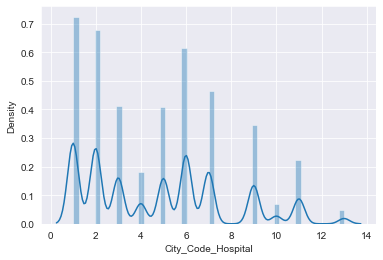

In [19]:
sns.distplot(df['City_Code_Hospital'])

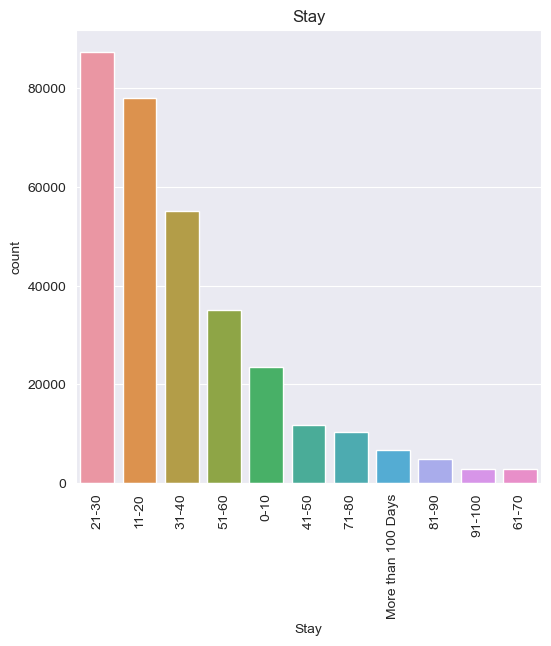

In [20]:
plot_count(df, 'Stay', rotate=True)

#### Correlation

<AxesSubplot:>

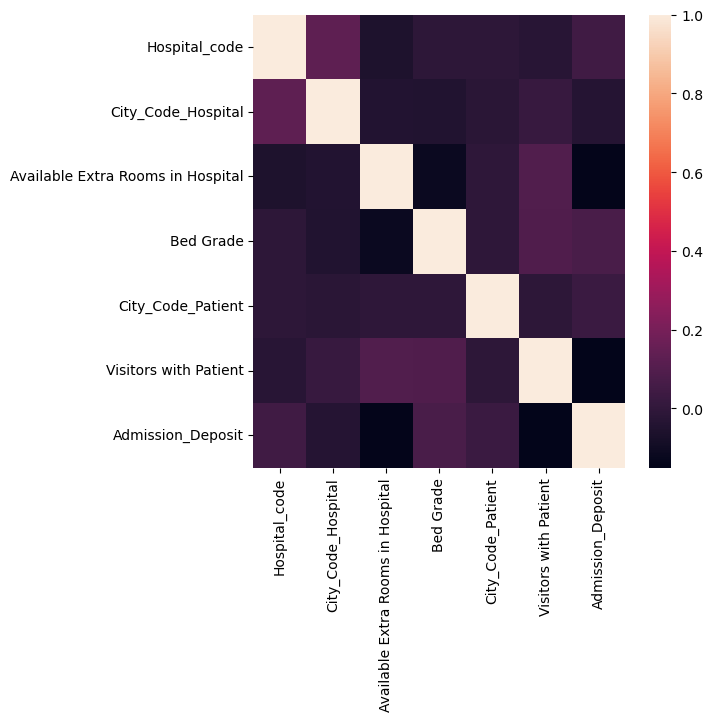

In [27]:
plt.figure(figsize=(6,6), dpi=100)
sns.heatmap(df.corr())

<Figure size 2000x2000 with 0 Axes>

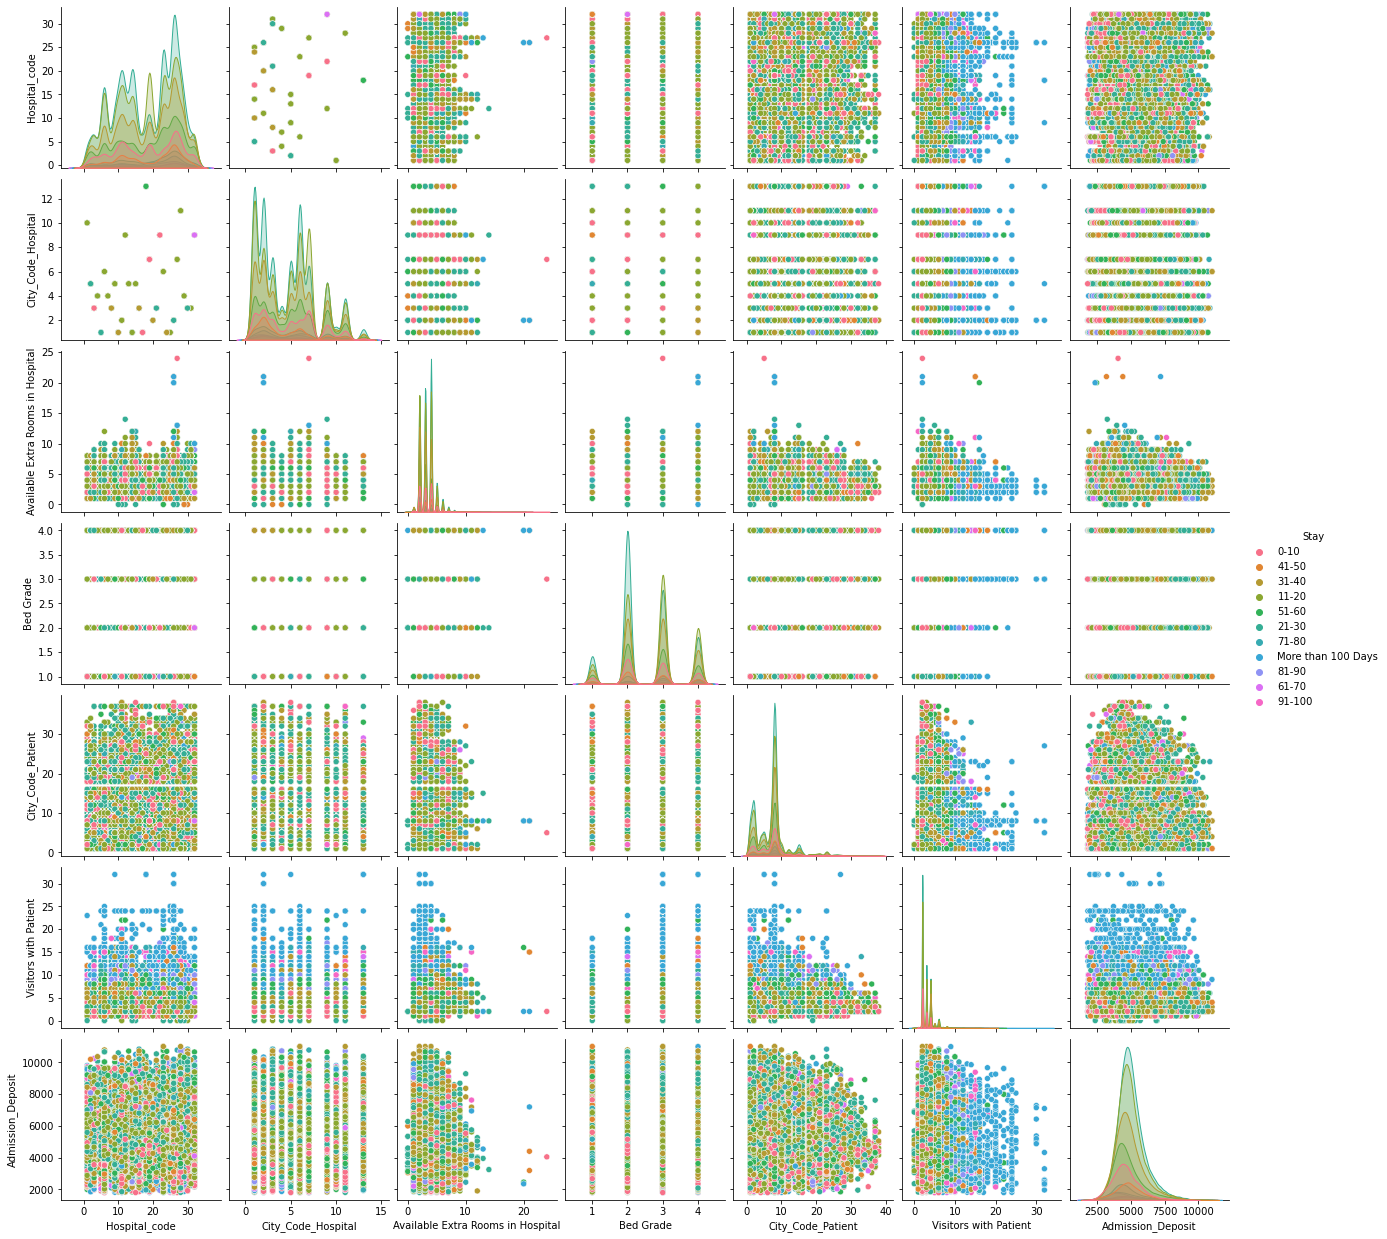

In [28]:
plt.figure(figsize=(10,10), dpi=200)
sns.pairplot(df, hue='Stay')

##### Insights:
1) it seems like the data has a very clear class imbalance, so we should try to balance the data.
2) We only have 3 numeric variables, so correlation plots between them maybe useful but not enough to be a reliable indicator of the relationship between the variables.
3) The categorical variables, having ordinal encoded, have some extreme outliers as well as many outliers from the box plots, might drop them due to the size of data can help us.
4) Due to the size of the data, class imbalance, and categorical features, scatter plots aren't very clear nor reliable.

## 2 - Data Preprocessing

### 2.1: Data Wrangling

#### 2.1.1: Missing Data

In [4]:
len(df[df.duplicated()])

# as for the comment above, the duplicated values aren't really duplicated, they're generated here due to dropping the case id and patient id.

152

In [5]:
def remove_duplicates(df):
    if len(df[df.duplicated()]) > 0:
        df.drop_duplicates(inplace=True)
    return

In [6]:
def find_missing(df):
    missing = (100 * df.isnull().sum() / len(df)).sort_values()
    missing = missing[missing > 0].sort_values()
    return missing

In [7]:
def handle_missing(df):
    missing = find_missing(df)
    if len(missing.axes[0]) > 0:
        df.dropna(axis=0, inplace=True)
    return df

In [8]:
def plot_missing(df):
    try:
        missing = find_missing(df)
        plt.figure(figsize=(4, 4), dpi=100)
        sns.barplot(x=missing.index, y=missing)
        plt.xticks(rotation=90)
    except ValueError:
        print('No Missing Values!')

<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

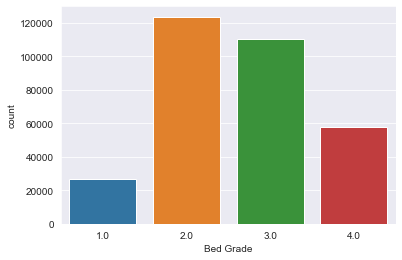

In [9]:
sns.countplot(data=df, x='Bed Grade')

In [10]:
missing = find_missing(df)
len(missing.axes[0])

2

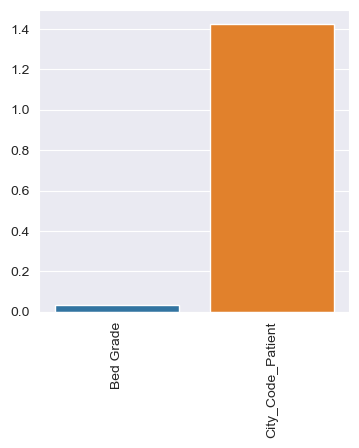

In [11]:
plot_missing(df)

In [12]:
print(df['Bed Grade'].value_counts())

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64


In [13]:
_, mode = df.groupby('Hospital_code')['Bed Grade'].value_counts().idxmax()
mode

2.0

In [37]:
#df['Bed Grade'] = df['Bed Grade'].fillna(2.0)

# thought of filling the missing values with the mode of bed grade values, but since they're categorical, it's not a good idea.

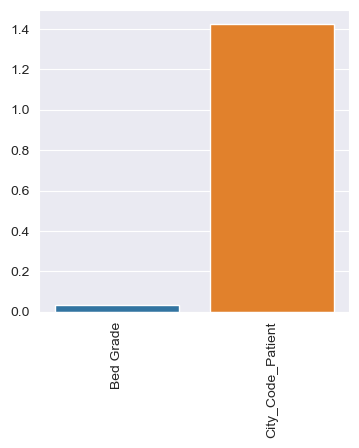

In [14]:
plot_missing(df)

In [15]:
df.dropna(axis=0, inplace=True)

# Just went ahead and removed the missing values since the size of the data can permit it.

In [16]:
missing = plot_missing(df)

No Missing Values!


<Figure size 400x400 with 0 Axes>

#### 2.1.2: Outliers

In [17]:
from scipy import stats
def outliers(df, label):
    # q75, q25 = np.percentile(df[label], [75, 25])
    # iqr = q75 - q25
    # lower = q25 - 1.5 * iqr
    # upper = q75 + 1.5 * iqr
    # df_filtered = df[(df[label] < upper) & (df[label] > lower)]
    # df_filtered = df_filtered[np.abs(df_filtered[f'{label}'] - df_filtered[f'{label}'].mean()) <=
    # (3*df_filtered[f'{label}'].std())]
    # return df_filtered
    data = df[(np.abs(stats.zscore(df[f'{label}'])) < 1.5)]
    return data

In [18]:
numeric_cols = df.select_dtypes(include=np.number)
correct_num = numeric_cols.drop(['Hospital_code', 'City_Code_Hospital', 'City_Code_Patient', 'Bed Grade'], axis=1)
correct_num.columns

Index(['Available Extra Rooms in Hospital', 'Visitors with Patient',
       'Admission_Deposit'],
      dtype='object')

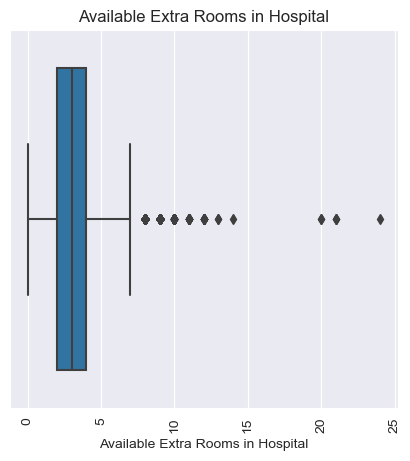

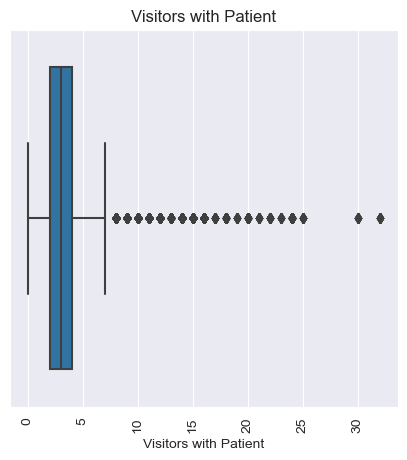

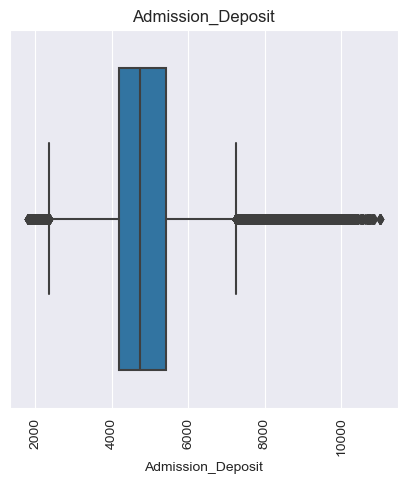

In [22]:
for c in correct_num.columns:
    plot_box(df, c)

For all 3 numeric variables, we can see that there are some outliers.

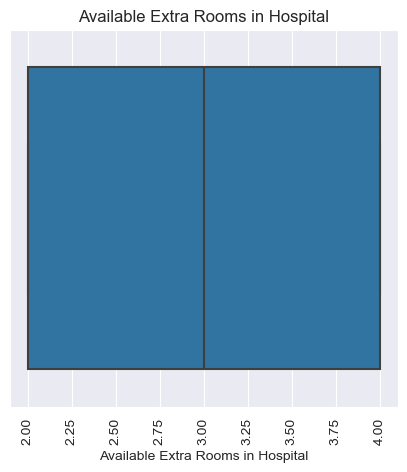

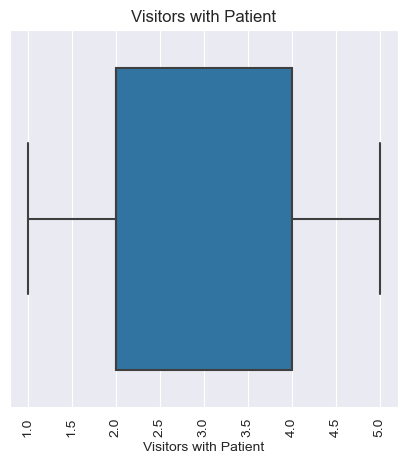

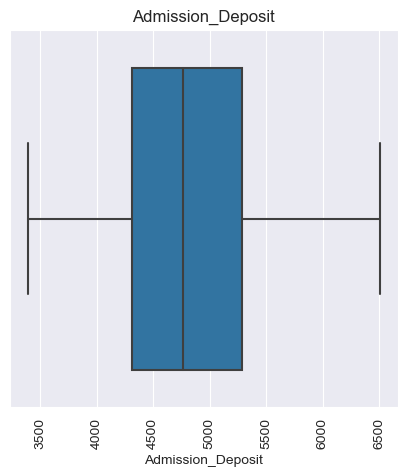

In [23]:
for c in correct_num.columns:
    df = outliers(df, c)
    plot_box(df, c)

Now we got rid of the outliers as well as the missing values and we don't have duplicate values anymore.

## 2.2: Normalization

Some of the categorical columns take numerical values, so we need to handle them before we normalize the numeric columns

In [24]:
from sklearn.preprocessing import Normalizer
def normalize(df):
    normalizer = Normalizer()
    numeric_cols = df.select_dtypes(include=np.number)
    correct_num = numeric_cols.drop(['Hospital_code', 'City_Code_Hospital', 'City_Code_Patient', 'Bed Grade'], axis=1)
    df['Admission_Deposit'] = df['Admission_Deposit'].apply(int)
    normalized_data = df.copy()
    features = normalized_data[correct_num.columns]
    normalizer.fit_transform(features.values)
    normalized_data[correct_num.columns] = features
    return normalized_data


In [25]:
train = normalize(df)

In [26]:
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745,31-40
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558,41-50
5,23,a,6,X,2,anesthesia,S,F,2.0,7.0,Trauma,Extreme,2,51-60,4449,11-20


## 2.3: Categorical Encoding

In [27]:
def categorical_encoding(df):
    """
    A function to perform categorical encoding
    :param df: The dataframe
    :return: dataframe with encoded features and the features
    """
    from sklearn.preprocessing import OrdinalEncoder
    categorical_features = df.select_dtypes(exclude=np.number)
    encoder = OrdinalEncoder()
    df[categorical_features.columns] = encoder.fit_transform(categorical_features)

    stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7,
                 '81-90': 8, '91-100': 9, 'More than 100 Days': 10}

    df['Stay'] = df['Stay'].replace(stay_dict.keys(), stay_dict.values())

    age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7,
                '81-90': 8, '91-100': 9}

    df['Age'] = df['Age'].replace(age_dict.keys(), age_dict.values())

    return df, categorical_features



In [28]:
train_scaled, _ = categorical_encoding(train)

In [29]:
train_scaled.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2.0,3,2.0,3,3.0,2.0,5.0,2.0,7.0,0.0,0.0,2,5.0,4911,0.0
1,2,2.0,5,2.0,2,3.0,3.0,5.0,2.0,7.0,1.0,0.0,2,5.0,5954,4.0
2,10,4.0,1,0.0,2,1.0,3.0,4.0,2.0,7.0,1.0,0.0,2,5.0,4745,3.0
4,26,1.0,2,1.0,2,3.0,3.0,3.0,2.0,7.0,1.0,0.0,2,5.0,5558,4.0
5,23,0.0,6,0.0,2,1.0,3.0,5.0,2.0,7.0,1.0,0.0,2,5.0,4449,1.0


# 3 - Modeling

## 3.1: Random Forest

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = train_scaled.drop(['Stay'], axis=1)
Y = train_scaled['Stay']
X_train, X_test_original, Y_train, Y_test_original = train_test_split(X, Y, test_size=0.15, random_state=42, stratify=Y)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
train_splits = np.array_split(X_train, 30)
test_splits = np.array_split(Y_train, 30)
forest_model = RandomForestClassifier(n_jobs=9, class_weight='balanced_subsample', n_estimators=64)
forest_model.fit(X_train, Y_train)
# for i in range(30):
#     forest_model.n_estimators += 64
#     forest_model.fit(train_splits[i], test_splits[i])  was trying to use mini batches, but it didn't work, due to sklearn limitations with the support for mini batches with the RandomForestClassifier
forests_preds = forest_model.predict(X_test_original)
print(accuracy_score(Y_test_original, forests_preds)*100)

37.86854853178638


In [33]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_original, forests_preds))

              precision    recall  f1-score   support

         0.0       0.26      0.14      0.18      2589
         1.0       0.39      0.44      0.41      9014
         2.0       0.41      0.54      0.47     10047
         3.0       0.33      0.26      0.29      5828
         4.0       0.07      0.02      0.03      1217
         5.0       0.39      0.41      0.40      3104
         6.0       0.09      0.02      0.03       242
         7.0       0.15      0.05      0.08       855
         8.0       0.35      0.09      0.15       137
         9.0       0.29      0.05      0.09       215
        10.0       0.25      0.05      0.08       194

    accuracy                           0.38     33442
   macro avg       0.27      0.19      0.20     33442
weighted avg       0.35      0.38      0.36     33442



as expected, due to the imbalance of the data, the accuracy is low, from the 33442 test samples, 19061 were from only two classes, leading to the precision and recall for other classes as shown in the classification report.

so we need to handle the imbalance of the data, our solution was to use the SMOTE oversampling method, which is a method that oversamples the minority class to make up for the imbalance in the data.

In [34]:
from imblearn.over_sampling import SMOTE
def oversample(x, y, method):
    if method == "smote":
        model = SMOTE()
        X, Y = model.fit_resample(x, y)
        return X, Y

In [35]:
x, y = oversample(X, Y, "smote")

In [36]:
x_train_oversampled, _, y_train_oversampled, _ = train_test_split(x, y, test_size=0.15, random_state=42, stratify=y)

we can't use the oversampled data for testing, it's only used for the training.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

forest_model = RandomForestClassifier(warm_start=True, n_jobs=9, n_estimators=64)
t1 = time.perf_counter()

#train_splits = np.array_split(x_train, 30)
#test_splits = np.array_split(y_train, 30)
# for i in range(0, 30):
#     forest_model.n_estimators += 1
#     forest_model.fit(train_splits[i], test_splits[i])

forest_model.fit(x_train_oversampled, y_train_oversampled)

forest_oversampled_preds = forest_model.predict(X_test_original)
t2 = time.perf_counter()
print(accuracy_score(Y_test_original, forest_oversampled_preds)*100)
print('time', t2-t1)

89.76436815979906
time 19.452801000000008


In [38]:
print(classification_report(Y_test_original, forest_oversampled_preds))

              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83      2589
         1.0       0.88      0.92      0.90      9014
         2.0       0.88      0.92      0.90     10047
         3.0       0.92      0.88      0.90      5828
         4.0       0.94      0.87      0.90      1217
         5.0       0.91      0.92      0.91      3104
         6.0       0.97      0.88      0.92       242
         7.0       0.94      0.88      0.91       855
         8.0       0.96      0.89      0.92       137
         9.0       0.95      0.82      0.88       215
        10.0       0.95      0.87      0.91       194

    accuracy                           0.90     33442
   macro avg       0.93      0.87      0.90     33442
weighted avg       0.90      0.90      0.90     33442



As we can see there's a huge improvement in the accuracy, but with more time for training since we basically increased the number of training examples to overcome the imbalance of the data.
But still 16.7 seconds is maybe a reasonable time to train the model, but we'll keep looking for a better solution.

Final note on Random forests:
For the grid searching for the parameters, it was very difficult to run it on my machine, so I had to use another library than sklearn, it's RAPIDS provided by Nvidia to run ML on the GPU, but with only a small problem which is it must run on a virtual machine with the virtual environment installed. so I couldn't include it here in the notebook.

## 3.2: KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_oversampled, y_train_oversampled)
knn_preds = knn.predict(X_test_original)
print(accuracy_score(Y_test_original, knn_preds))

0.6185335805274804
0.6185335805274804


The KNN algorithm with 3 neighbors was worse for the accuracy, but it was so much faster, so it's worth trying different parameters for the KNN algorithm to see if we can increase the accuracy here.
I'll go for the elbow method to find the optimal number of neighbors, and see if we can improve the accuracy.

In [41]:
test_error_rates = []
fit_times = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    t1 = time.perf_counter()
    knn_model.fit(x_train_oversampled, y_train_oversampled)
    t2 = time.perf_counter()
    fit_times.append(t2-t1)
    print(f"time for fitting model with {k} neighbors is: {t2-t1}")
    y_pred = knn_model.predict(X_test_original)
    test_error_rates.append(1-accuracy_score(Y_test_original, y_pred))

time for fitting model with 1 neighbors is: 5.234153300000003
time for fitting model with 2 neighbors is: 5.769286399999999
time for fitting model with 3 neighbors is: 5.208320800000024
time for fitting model with 4 neighbors is: 4.974254900000005
time for fitting model with 5 neighbors is: 5.002410600000019
time for fitting model with 6 neighbors is: 4.919857699999994
time for fitting model with 7 neighbors is: 5.044400199999984
time for fitting model with 8 neighbors is: 4.978688099999999
time for fitting model with 9 neighbors is: 5.243863500000003
time for fitting model with 10 neighbors is: 4.9680184999999994
time for fitting model with 11 neighbors is: 4.8241305999999895
time for fitting model with 12 neighbors is: 5.091142300000001
time for fitting model with 13 neighbors is: 5.176636899999977
time for fitting model with 14 neighbors is: 5.3991263000000345
time for fitting model with 15 neighbors is: 5.053551900000002
time for fitting model with 16 neighbors is: 5.01292419999998

Text(0.5, 1.0, 'KNN Error Rate vs K Neighbors')

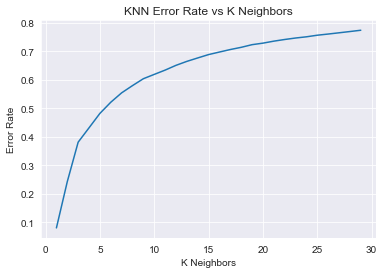

In [42]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')
plt.title("KNN Error Rate vs K Neighbors")

Text(0.5, 1.0, 'Time to fit KNN model for each K')

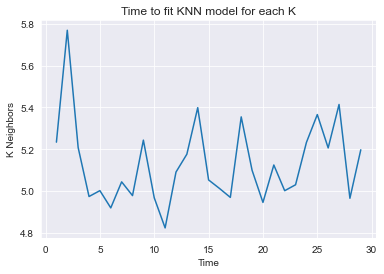

In [43]:
plt.plot(range(1,30), fit_times)
plt.xlabel('Time')
plt.ylabel('K Neighbors')
plt.title("Time to fit KNN model for each K")

The two plots above show us some very interesting findings, first the KNN accuracy gets worse as the number of neighbors increases, and the time to fit the model increases as the number of neighbors ranges between 4.1 and 4.8 seconds which is a very good time to fit the model compared to Random Forests model with also a better accuracy for number of neighbors equal to 1

In [50]:
knn = KNeighborsClassifier(n_neighbors=1)
t1 = time.perf_counter()
knn.fit(x_train_oversampled, y_train_oversampled)
t2 = time.perf_counter()
knn_preds = knn.predict(X_test_original)
print(f"Accuracy: {accuracy_score(Y_test_original, knn_preds)}")
print(f"Time: {t2-t1}")

Accuracy: 0.9196818372106932
Time: 5.21584630000001


In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
forests_proba = forest_model.predict_proba(X_test_original)
roc_auc_score(Y_test_original, forests_proba, multi_class="ovo", average="macro")

0.9808336457578593

In [47]:
print(classification_report(Y_test_original, forest_oversampled_preds))

              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83      2589
         1.0       0.88      0.92      0.90      9014
         2.0       0.88      0.92      0.90     10047
         3.0       0.92      0.88      0.90      5828
         4.0       0.94      0.87      0.90      1217
         5.0       0.91      0.92      0.91      3104
         6.0       0.97      0.88      0.92       242
         7.0       0.94      0.88      0.91       855
         8.0       0.96      0.89      0.92       137
         9.0       0.95      0.82      0.88       215
        10.0       0.95      0.87      0.91       194

    accuracy                           0.90     33442
   macro avg       0.93      0.87      0.90     33442
weighted avg       0.90      0.90      0.90     33442



In [48]:
knn_proba = knn_model.predict_proba(X_test_original)
roc_auc_score(Y_test_original, knn_proba, multi_class="ovo", average="macro")

0.9206994240791342

In [49]:
print(classification_report(Y_test_original, knn_preds))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      2589
         1.0       0.94      0.90      0.92      9014
         2.0       0.95      0.89      0.92     10047
         3.0       0.92      0.93      0.92      5828
         4.0       0.85      0.99      0.92      1217
         5.0       0.90      0.97      0.94      3104
         6.0       0.76      1.00      0.87       242
         7.0       0.87      1.00      0.93       855
         8.0       0.76      0.99      0.86       137
         9.0       0.82      1.00      0.90       215
        10.0       0.81      0.99      0.89       194

    accuracy                           0.92     33442
   macro avg       0.86      0.96      0.91     33442
weighted avg       0.92      0.92      0.92     33442



So for the accuracy and the run time the KNN is better than the random forests, but interestingly the Random Forests model has a better auc score than the KNN model. so it'd be an interesting discussion to choose which model, personally I'd go for the KNN model since it's faster and has a better accuracy, and the difference in the auc isn't that big as the difference in time taken for fitting the model.

## 4.3: Logistic Regression & SGD

In [51]:
from sklearn.preprocessing import MinMaxScaler
def normMinMax(df,label):

    df[label] = MinMaxScaler().fit_transform(np.array(df[label]).reshape(-1,1))
    return df[label]

In [52]:
df_logistic = df.copy()
for c in numeric_cols.columns:
    df_logistic[c]=normMinMax(df_logistic,c)

In [53]:
nominal_features = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission']
ordinal_features = ['Severity of Illness','Age']

In [54]:
# One-Hot encoding of Nominal Features!

def one_hot_encode(dataset,features):
    nominal_df = dataset[features]

    # convert into dummies
    nominal_dummies = pd.get_dummies(nominal_df, drop_first=False)
    # drop categorical variables
    dataset = dataset.drop(list(nominal_df.columns), axis=1)
    # concat dummy variables with X
    dataset = pd.concat([dataset, nominal_dummies], axis=1)
    return dataset

de_1_df = one_hot_encode(df_logistic,nominal_features)
de_1_df.head()


,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,...,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent
0,0.225806,0.166667,0.5,0.333333,0.162162,Extreme,0.25,51-60,0.488625,0-10,...,0,0,0,0,0,0,1,1,0,0
1,0.032258,0.333333,0.0,0.333333,0.162162,Extreme,0.25,51-60,0.822813,41-50,...,0,0,0,0,0,0,1,0,1,0
2,0.290323,0.000000,0.0,0.333333,0.162162,Extreme,0.25,51-60,0.435437,31-40,...,0,0,0,0,0,1,0,0,1,0
4,0.806452,0.083333,0.0,0.333333,0.162162,Extreme,0.25,51-60,0.695931,41-50,...,0,0,0,0,1,0,0,0,1,0
5,0.709677,0.416667,0.0,0.333333,0.162162,Extreme,0.25,51-60,0.340596,11-20,...,0,0,0,0,0,0,1,0,1,0


In [55]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
ordinal_series_sev = ordinal.fit_transform(de_1_df[['Severity of Illness']])
ordinal_series_age = ordinal.fit_transform(de_1_df[['Age']])
de_2_df = de_1_df.drop(columns= ordinal_features)
de_2_df['Severity of Illness'] = ordinal_series_sev
de_2_df['Age'] = ordinal_series_age

In [56]:
de_2_df.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,...,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness,Age
0,0.225806,0.166667,0.5,0.333333,0.162162,0.25,0.488625,0-10,0,0,...,0,0,0,0,1,1,0,0,0.0,5.0
1,0.032258,0.333333,0.0,0.333333,0.162162,0.25,0.822813,41-50,0,0,...,0,0,0,0,1,0,1,0,0.0,5.0
2,0.290323,0.000000,0.0,0.333333,0.162162,0.25,0.435437,31-40,0,0,...,0,0,0,1,0,0,1,0,0.0,5.0
4,0.806452,0.083333,0.0,0.333333,0.162162,0.25,0.695931,41-50,0,1,...,0,0,1,0,0,0,1,0,0.0,5.0
5,0.709677,0.416667,0.0,0.333333,0.162162,0.25,0.340596,11-20,1,0,...,0,0,0,0,1,0,1,0,0.0,5.0


In [57]:
from sklearn.preprocessing import LabelEncoder
LabelEncode = LabelEncoder()
de_2_df['Stay'] = LabelEncode.fit_transform(de_2_df['Stay'])
de_2_df.Stay.value_counts(sort=True)

2     66977
1     60095
3     38855
5     20693
0     17257
4      8112
7      5699
6      1617
9      1433
10     1292
8       911
Name: Stay, dtype: int64

In [58]:
X_logistic = de_2_df.drop(columns= ['Stay'])
y_logistic = de_2_df[['Stay']]

In [59]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic,
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=42)


In [60]:
from imblearn.over_sampling import SMOTE
print(y.shape[0])
oversample = SMOTE()
X_sampled, y_sampled = oversample.fit_resample(X_train_logistic, y_train_logistic)
print(y_sampled.value_counts())
print('increased= ',y_sampled.shape[0]-y_logistic.shape[0])

736747
Stay
0       53569
1       53569
2       53569
3       53569
4       53569
5       53569
6       53569
7       53569
8       53569
9       53569
10      53569
dtype: int64
increased=  366318


In [61]:
## Grid search on all parameters took infinite time to run:) so by research and studing the docmentation we conclude that these are the best combinations
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
logModel3 = LogisticRegression(penalty='l2',solver='liblinear',max_iter=10000,n_jobs=-1)
t1 = time.perf_counter()
logModel3.fit(X_train_logistic, y_train_logistic.values.ravel())
t2 = time.perf_counter()
print('time', t2-t1)
####
print (f'Accuracy - : {logModel3.score(X_test_logistic,y_test_logistic):.3f}')

C:\Users\Habib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


time 22.026649099999986
Accuracy - : 0.391


In [ ]:
import time
## Grid search on all parameters took infinite time to run:) so by research and studing the docmentation we conclude that these are the best combinations
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
logModel = LogisticRegression(penalty='l2',solver='newton-cg',max_iter=10000,n_jobs=-1)
t1 = time.perf_counter()
logModel.fit(X_train_logistic, y_train_logistic.values.ravel())
t2 = time.perf_counter()
print('time', t2-t1)
####
print (f'Accuracy - : {logModel.score(X_test_logistic,y_test_logistic):.3f}')


In [ ]:
import time
## Grid search on all parameters took infinite time to run:) so by research and studing the docmentation we conclude that these are the best combinations
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
logModel = LogisticRegression(penalty='l2',solver='newton-cg',max_iter=10000,n_jobs=-1)
t1 = time.perf_counter()
logModel.fit(X_train_logistic, y_train_logistic.values.ravel())
t2 = time.perf_counter()
print('time', t2-t1)
####
print (f'Accuracy - : {logModel.score(X_test_logistic,y_test_logistic):.3f}')

In [ ]:
## Grid search on all parameters took infinite time to run:) so by research and studing the docmentation we conclude that these are the best combinations
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
logModel = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=10000)
t1 = time.perf_counter()
logModel.fit(X_train_logistic, y_train_logistic.values.ravel())
t2 = time.perf_counter()
print('time', t2-t1)
####
print (f'Accuracy - : {logModel.score(X_test_logistic,y_test_logistic):.3f}')

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
# SGDClf = linear_model.SGDClassifier(max_iter = 10000, tol=1e-3,penalty = "elasticnet")
t1 = time.perf_counter()
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01],
    "penalty" : ["l2", "l1", "none"],
}
model = SGDClassifier(max_iter=10000,n_jobs=-1)
clf = GridSearchCV(model, param_grid=params)
clf.fit(X_train_logistic, y_train_logistic.values.ravel())
print(clf.best_score_)
print(clf.best_estimator_)
print('time', t2-t1)
print (f'Accuracy - : {clf.score(X_test_logistic,y_test_logistic):.3f}')

## 4.4: xGBoost

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
import time
from sklearn.model_selection import RandomizedSearchCV

params= {'objective':['multi:softprob'],
              'max_depth': [3,5,7,9],
              'min_child_weight': [1,5,10,15],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=400)

grid_search= RandomizedSearchCV(xgb, cv=3, verbose=2,param_distributions= params, n_iter=4)


grid_search.fit(x_train_oversampled, y_train_oversampled)


In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_estimator_

In [ ]:
y_pred= grid_search.best_estimator_.predict(X_test_original)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test_original,y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_original,y_pred))

## 4.5: Support Vector Machine

### 4.5.1: Support Vector Machine with Linear Kernel

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#               'gamma': [1e-3, 1e-4, 1e-5],
#               'degree': [2, 3, 4, 5],
#               'coef0': [0.1, 1, 10, 100, 1000]}
# grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=2, n_jobs=-1)

In [ ]:
linear_svm_model = SVC(C=None, kernel='linear')
linear_svm_model.fit(x_train_oversampled, y_train_oversampled)
linear_svm_preds = linear_svm_model.predict(X_test_original)
print(classification_report(Y_test_original,linear_svm_preds))

### 4.5.2: Support Vector Machine with rbf Kernel


In [136]:
svm = SVC()
svm.fit(x_train_oversampled, y_train_oversampled)
svm_preds = svm.predict(X_test_original)
print(classification_report(Y_test_original,svm_preds))

### 4.5.3: Support Vector Machine with Custom Kernel (Gaussian)

In [ ]:
def gaussianKernelGramMatrix(X1, X2, K_function=gaussianKernel):
    """(Pre)calculates Gram Matrix K"""

    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = K_function(x1, x2)
    return gram_matrix
